In [77]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix


from sklearn.tree import DecisionTreeClassifier,plot_tree


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [78]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [79]:

data = pd.read_csv("penguinsFeatures.csv")


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [80]:

data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [81]:
# Covariance

print('Covariance:')
data.cov()

Covariance:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [82]:

# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missingValueInstances= missing_values_table(data)
missingValueInstances

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,10,2.9
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [83]:

#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
data.iloc[:,:] = imputer.fit_transform(data)

data.isnull().sum()




species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

KeyboardInterrupt: 

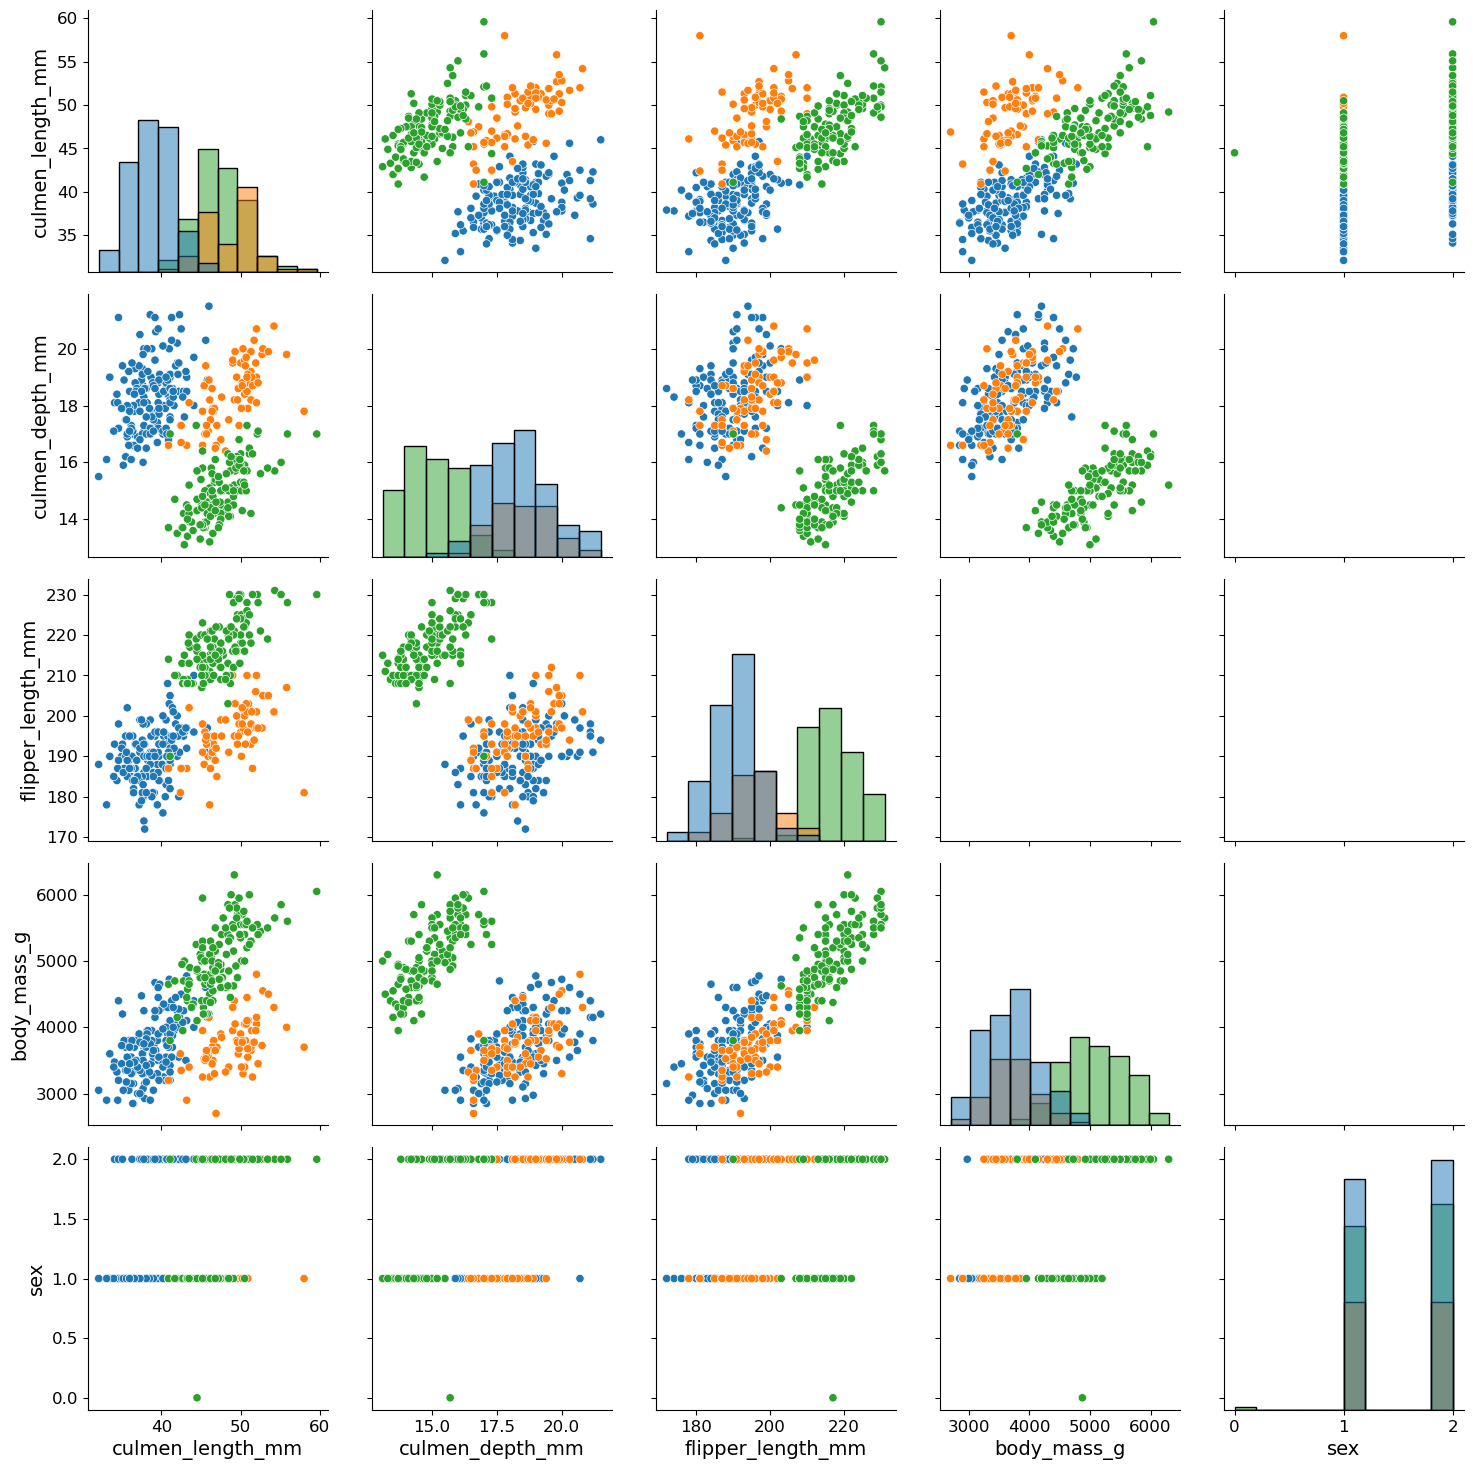

In [84]:
#Assigning binary classification for data
lb = LabelEncoder()
data["sex"] = lb.fit_transform(data["sex"])

sns.pairplot(data, hue="species", height=3,diag_kind="hist")


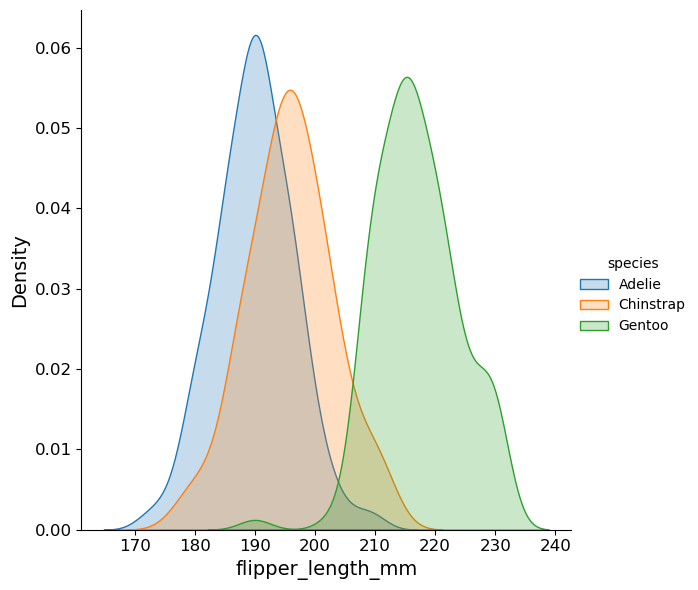

In [ ]:
sns.FacetGrid(data, hue="species", height=6,) \
   .map(sns.kdeplot, "flipper_length_mm",fill=True) \
   .add_legend()

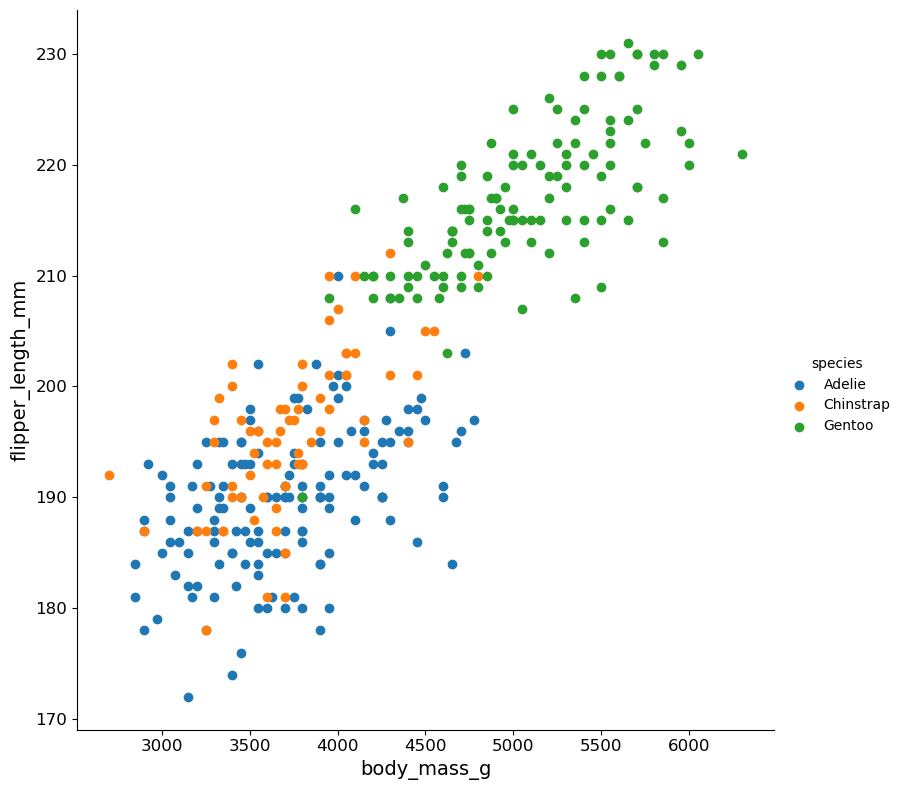

In [ ]:
sns.FacetGrid(data, hue="species", height=8) \
   .map(plt.scatter, "body_mass_g", "flipper_length_mm") \
   .add_legend()

In [ ]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [ ]:
LinearData = data.copy()

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

LinearData['species'].unique()
LinearData['species'].replace({'Adelie' : 0,
                                'Chinstrap' : 1,
                                'Gentoo': 2}, inplace = True)

LinearData['culmen_length_mm'] = mms.fit_transform(LinearData['culmen_length_mm'].values.reshape(-1, 1))
LinearData['culmen_depth_mm'] = mms.fit_transform(LinearData['culmen_depth_mm'].values.reshape(-1, 1))
LinearData['flipper_length_mm'] = mms.fit_transform(LinearData['flipper_length_mm'].values.reshape(-1, 1))
LinearData['body_mass_g'] = mms.fit_transform(LinearData['body_mass_g'].values.reshape(-1, 1))



feature_cols = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g','sex']
X = LinearData[feature_cols] # Features
y = LinearData.species # Target variable

#print(X.shape, y.shape)


In [ ]:


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test
    
print(X_train)


     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
219          0.658182         0.666667           0.440678     0.298611    1
271          0.596364         0.119048           0.813559     0.722222    2
266          0.487273         0.095238           0.644068     0.416667    1
335          0.836364         0.345238           0.983051     0.875000    2
217          0.636364         0.607143           0.355932     0.298611    2
..                ...              ...                ...          ...  ...
323          0.618182         0.226190           0.949153     0.777778    2
192          0.614545         0.761905           0.644068     0.347222    2
117          0.189091         0.880952           0.457627     0.298611    2
47           0.196364         0.690476           0.118644     0.076389    2
172          0.374545         0.500000           0.152542     0.250000    1

[240 rows x 5 columns]


<AxesSubplot:>

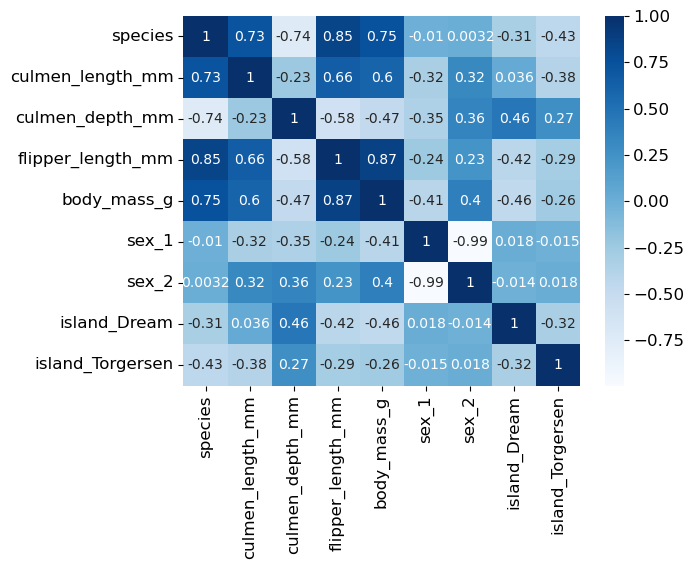

In [ ]:
new_df_dummy = pd.get_dummies(LinearData, columns = ['sex', 'island'], drop_first = True)
new_df_dummy['species'].unique()

new_df_dummy['species'].replace({'Adelie' : 0,
                                'Chinstrap' : 1,
                                'Gentoo': 2}, inplace = True)

sns.heatmap(new_df_dummy.corr(), annot = True, cmap = 'Blues')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
from keras import backend as K

LinearData.describe()


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,0.429292,0.482177,0.489013,0.416505,1.514535
std,0.893320,0.198105,0.234412,0.238055,0.222277,0.506308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.260909,0.297619,0.305085,0.236111,1.000000
50%,1.000000,0.441818,0.500000,0.423729,0.368056,2.000000
75%,2.000000,0.596364,0.666667,0.694915,0.569444,2.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [98]:
def create_model():
    '''The function creates a Perceptron using Keras'''
    model = Sequential()
    # model.add(Dense(16, input_dim=len(X.columns), activation='relu'))
    # model.add(Dense(12, activation='relu'))
    # model.add(Dropout(0.2))
    # model.add(Dense(3, activation='relu'))
    # model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(12, input_dim=len(X.columns), activation='sigmoid'))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    
    
    return model
estimator = create_model()
optimizer = keras.optimizers.Adam(lr=1)
estimator.compile(optimizer=optimizer, metrics=['Accuracy', tf.keras.metrics.MeanSquaredError()], 
                  loss='mean_squared_error')
K.set_value(estimator.optimizer.learning_rate, 0.8)
optimizer.learning_rate.assign(10)
print(optimizer.learning_rate)
history = estimator.fit(X_train, y_train, batch_size = 200,epochs=500, validation_data=(X_test, y_test))

print(tf.keras.metrics.Accuracy())

history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()



<tf.Variable 'learning_rate:0' shape=() dtype=int32, numpy=10>
Epoch 1/500


c:\Users\mohaa\anaconda3\envs\meta\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



2/2 [==============================] - 1s 203ms/step - loss: 0.8467 - Accuracy: 0.2167 - mean_squared_error: 0.8467 - val_loss: 0.8462 - val_Accuracy: 0.1538 - val_mean_squared_error: 0.8462
Epoch 2/500
2/2 [==============================] - 0s 26ms/step - loss: 0.7833 - Accuracy: 0.2167 - mean_squared_error: 0.7833 - val_loss: 0.8462 - val_Accuracy: 0.1538 - val_mean_squared_error: 0.8462
Epoch 3/500
2/2 [==============================] - 0s 27ms/step - loss: 0.7833 - Accuracy: 0.2167 - mean_squared_error: 0.7833 - val_loss: 0.8462 - val_Accuracy: 0.1538 - val_mean_squared_error: 0.8462
Epoch 4/500
2/2 [==============================] - 0s 26ms/step - loss: 0.7833 - Accuracy: 0.2167 - mean_squared_error: 0.7833 - val_loss: 0.8462 - val_Accuracy: 0.1538 - val_mean_squared_error: 0.8462
Epoch 5/500
2/2 [==============================] - 0s 26ms/step - loss: 0.7833 - Accuracy: 0.2167 - mean_squared_error: 0.7833 - val_loss: 0.8462 - val_Accuracy: 0.1538 - val_mean_squared_error: 0.8462
E

KeyboardInterrupt: 

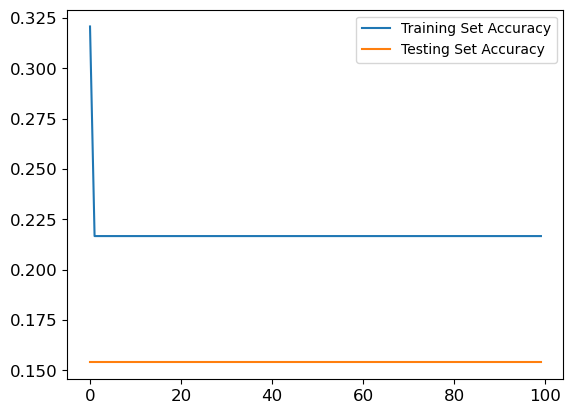

In [ ]:

plt.plot(history_df['Accuracy'], label='Training Set Accuracy')
plt.plot(history_df['val_Accuracy'], label='Testing Set Accuracy')
plt.legend()

Epoch 1/400


c:\Users\mohaa\anaconda3\envs\meta\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



3/3 [==============================] - 1s 91ms/step - loss: -27.3226 - Accuracy: 0.2167 - val_loss: -214.3801 - val_Accuracy: 0.1538
Epoch 2/400
3/3 [==============================] - 0s 13ms/step - loss: -1336.6250 - Accuracy: 0.2167 - val_loss: -5256.2500 - val_Accuracy: 0.1538
Epoch 3/400
3/3 [==============================] - 0s 13ms/step - loss: -10793.6826 - Accuracy: 0.2167 - val_loss: -28438.8457 - val_Accuracy: 0.1538
Epoch 4/400
3/3 [==============================] - 0s 12ms/step - loss: -49248.7109 - Accuracy: 0.2167 - val_loss: -100245.7109 - val_Accuracy: 0.1538
Epoch 5/400
3/3 [==============================] - 0s 13ms/step - loss: -163962.2656 - Accuracy: 0.2167 - val_loss: -281732.8438 - val_Accuracy: 0.1538
Epoch 6/400
3/3 [==============================] - 0s 12ms/step - loss: -416389.3438 - Accuracy: 0.2292 - val_loss: -666232.5625 - val_Accuracy: 0.1923
Epoch 7/400
3/3 [==============================] - 0s 13ms/step - loss: -917048.6250 - Accuracy: 0.2500 - val_loss

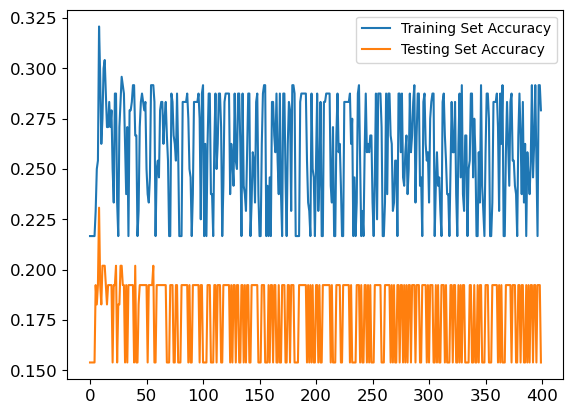

In [106]:
def create_model():
    '''The function creates a Perceptron using Keras'''
    model = Sequential()
    # model.add(Dense(16, input_dim=len(X.columns), activation='relu'))
    # model.add(Dense(12, activation='relu'))
    # model.add(Dropout(0.2))
    # model.add(Dense(3, activation='relu'))
    # model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(12, input_dim=len(X.columns), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model
estimator = create_model()
optimizer = keras.optimizers.Adam(lr=0.8)

estimator.compile(optimizer=optimizer, metrics=['Accuracy'], 
                  loss='binary_crossentropy')
K.set_value(estimator.optimizer.learning_rate, 0.8)

history = estimator.fit(X_train, y_train, batch_size=80, epochs=400, validation_data=(X_test, y_test))


history_df = pd.DataFrame(history.history)

plt.plot(history_df['Accuracy'], label='Training Set Accuracy')
plt.plot(history_df['val_Accuracy'], label='Testing Set Accuracy')
plt.legend()
